# ***Premise***
---
---

# ***Questions***
---
---

+ **Easy**
    + Which year had the most meteors?
        - _2013_
    + What is the average mass of a meteors we've observed?
+ **Hard**
    + Are there more meteors around the equator or the poles?
    + What time of year got the most asteroids? (Noticable trends in year data)
+ **Other**
    + How many meteors fell in important years (birth year(1995), Y2K, 2008(Obama), 2020(Now))?


# ***Concepts to cover***
---
---

- [x] Histograms
- [ ] PDF
- [ ] CDF
- [ ] Hypothesis Testing
- [ ] Confidence Interval
- [ ] Correlation
- [ ] Outliers
- [ ] Normal Distribution
- [ ] Time Analysis

# ***Imports***
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# ***Data***
---
---

In [2]:
data = pd.read_csv('../data/meteorite-landings.csv')
print(data.columns)

data.head()


Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Basic Statistics

In [3]:
print("Data described: \n")
print(data.describe())
print('\n')
print("Data info: \n")
print(data.info())

Data described: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   n

*Conclusions / Questions*
    - There are missing values in mass, year, and locations
    - Appropriate data types thus far

# ***Cleaning***
---
---
- [ ] Drop NaN?
- [x] Convert Dates
- [x] Adjust Data Types
- [x] Change Column Names
- [ ] Select proper Geolocation formatting
- [x] Select test data (use `.sample()`)

## Rename columns

In [4]:
data.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long'}, inplace=True)
data

,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


*Conclusions / Questions*
    - ...

## Sampling
---
## (Test sample size is set to 10%)
## **Only comment out once all testing / experiment is done, to use real data)**

In [5]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
data['year'].fillna(0).astype(int)
data['mass'].fillna(0).astype(int)

data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())

Original Data Stats: 

                 id          mass          year           lat          long
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330

--------

New Sample Data Stats: 

                 id          mass         year          lat         long
count   4572.000000  4.568000e+03  4549.000000  3873.000000  3873.000000
mean   26459.506999  3.484394e+03  1991.647615   -40.045410    62.735276
std    16872.903490  5.402721e+04    3

*Conclusions / Questions*
    - ...

## Outliers

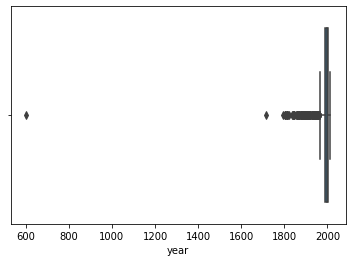

In [6]:
sns.boxplot(x=data['year'])


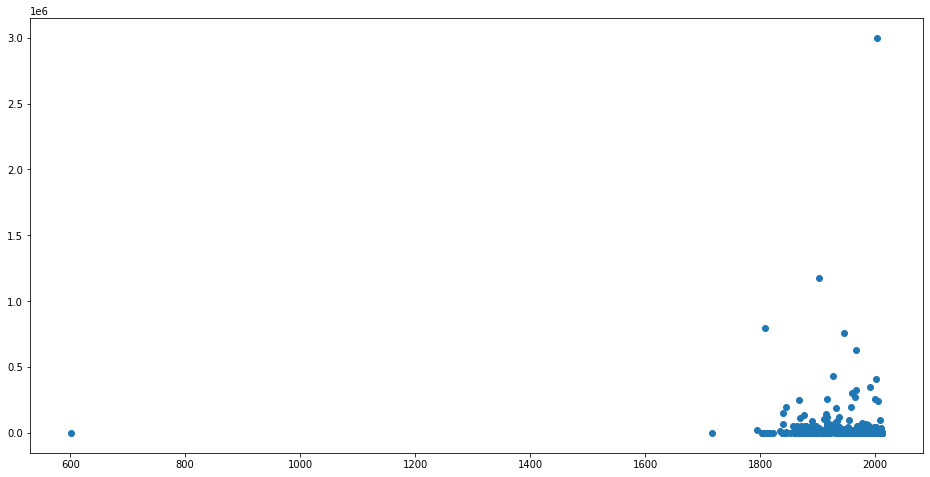

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['year'], data['mass'])
# ax.set_xlabel('Proportion of non-retail business acres per town')
# ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [14]:
z = np.abs(stats.zscore(data['mass']))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


# ***Statistical Plotting***
---
---

## Fall vs Fallen Histogram

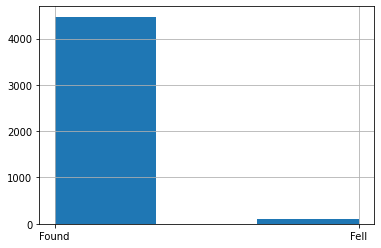

In [9]:
data['fall'].hist(bins=3)  # 
plt.show()

*Conclusions / Questions*
    - ...

## Equator or Poles

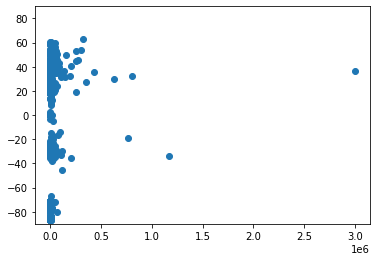

Above Equator: 839 

At Equator: 633 

Below Equator: 2401 



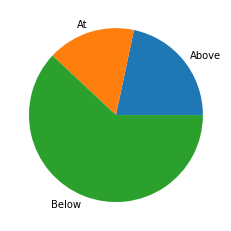

In [15]:
plt.scatter(data.mass, data.lat)
# print(data[data['lat']>0].count())
# print(data[data['lat']<0].count())
axes = plt.gca()
axes.set_ylim([-90,90])
above_equator = data[data.lat >0].shape[0]
at_equator = data[data.lat ==0].shape[0]
below_equator = data[data.lat <0].shape[0]
plt.show()

print("Above Equator:", above_equator, '\n')
print("At Equator:", at_equator, '\n')
print("Below Equator:", below_equator, '\n')

labels = ["Above", 'At', 'Below']
values = [above_equator, at_equator, below_equator]
plt.pie(values, labels=labels)
plt.show()

*Conclusions / Questions*
    - There are missig values because of the `Nan` values that I didn't remove. If I do remove then and replace them with 0, then it'ss alter results of values that actually are on the equator or prime meridian

## PDF

*Conclusions / Questions*
    - ...

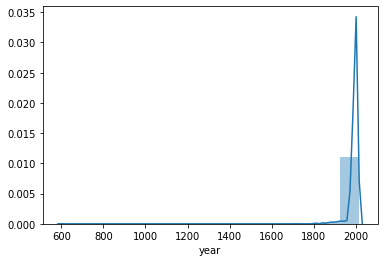

In [16]:
sns.distplot(data['year'].dropna(), hist=True, kde=True, bins=16)

*Conclusions / Questions*
    - ...

## CDF

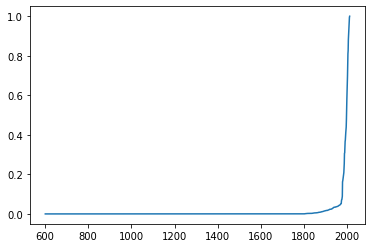

In [17]:
ls_year = data['year'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_year = [calculate_cdf(ls_year, r)/len(ls_year) for r in range(int(np.min(ls_year)), int(np.max(ls_year)))]

plt.plot(range(int(np.min(ls_year)), int(np.max(ls_year))), cdf_year)


*Conclusions / Questions*
    - ...

## Violin Plot

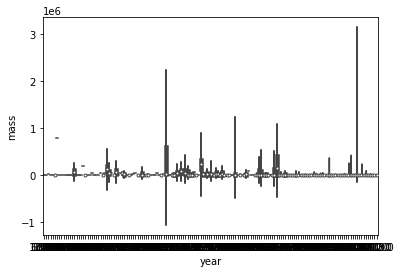

In [18]:
sns.violinplot(x="year", y="mass", data=data)


*Conclusions / Questions*
    - Why are the masses in the violin plot negative?

## Correlation

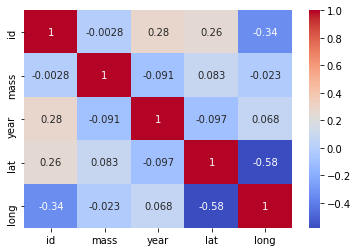

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


# ***Various Plotting***
---
---

## See the top 10 classification of meteors

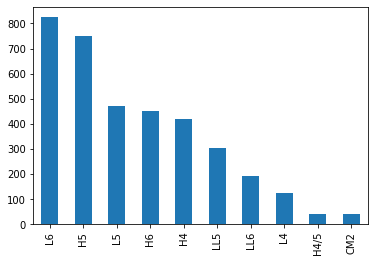

In [21]:
top_10_class = data['class'].value_counts()[:10]
plt.bar(top_10_class, height = 1)

top_10_class.plot(kind='bar')

*Conclusions / Questions*
    - ...

## Lat and Long scatter plot, using mass as bubble size

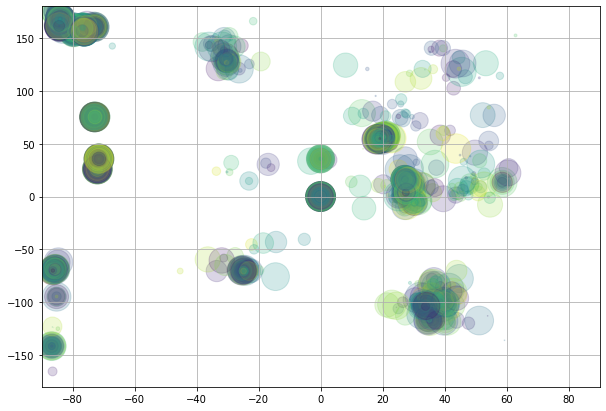

In [22]:
plt.figure(figsize=(10,7))
N = len(data['mass'])
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)
plt.scatter(data['lat'], data['long'], s=area, c=colors, alpha=0.2)

plt.grid(True)
axes = plt.gca()
axes.set_xlim([-90,90])
axes.set_ylim([-180,180])
plt.show()

*Conclusions / Questions*
    - ...

In [23]:
print(data['year'].value_counts())
# data['recclass'].value_counts().plot(kind='bar')  # bar chart of the amount embarked passengers by class

1979.0    336
2003.0    312
1998.0    270
2006.0    250
1988.0    234
         ... 
1859.0      1
1838.0      1
1898.0      1
1951.0      1
1844.0      1
Name: year, Length: 154, dtype: int64


## Time Analysis

In [24]:
data['year'].fillna(0).astype(int)


30831    2000
18375    2003
1544     1993
21419    1988
39609    1979
         ... 
29717    2002
36304    1981
2528     1977
7351     2000
2335     1988
Name: year, Length: 4572, dtype: int64

*Conclusions / Questions*
    - ...

Years describes:  count    154.000000
mean      29.538961
std       64.415840
min        1.000000
25%        1.000000
50%        2.000000
75%        8.250000
max      336.000000
Name: year, dtype: float64 

Confirming amount of unique year 154 

Year with most recorded data: 2013.0
Total span of year data:  1412.0 years



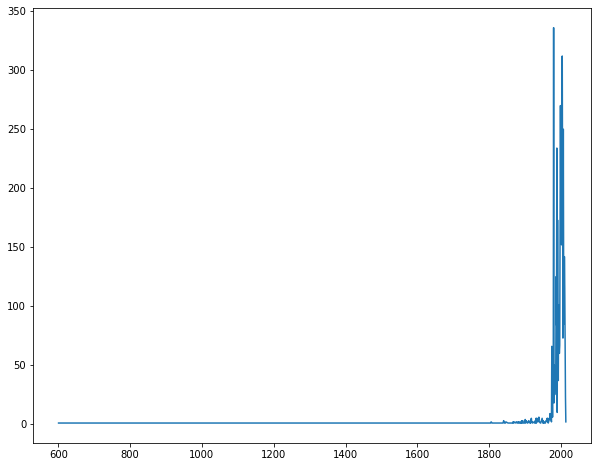

In [25]:
year_count = data.groupby('year')['year'].count()
plt.figure(figsize=(10,8))
plt.plot(year_count)
print("Years describes: ", year_count.describe(), '\n')
print("Confirming amount of unique year", data.year.nunique(), '\n')
print("Year with most recorded data:", data.year.max())
print("Total span of year data: ", data.year.max()-data.year.min(), 'years\n')
# plt.hist(year_count)

*Conclusions / Questions*
    - ...